In [6]:
import pandas as pd

In [3]:
!pip install python-dotenv
!pip install requests
!pip install tqdm
!pip install pymongo

In [1]:
import sorrentum_sandbox.examples.ml_projects.Issue22_Team3_Implement_sandbox_for_Coinmarketcap as coinmarketcap

coinmarketcap_db = coinmarketcap.db

In [2]:
import pymongo
mongo_saver = coinmarketcap_db.MongoDataSaver(
    mongo_client=pymongo.MongoClient(
        host="host.docker.internal",
        port=27017,
        username="mongo",
        password="mongo",
    ),
    db_name="CoinMarketCap",
)

In [3]:
df=mongo_saver.get_data('bitcoin_coinmarketcap_spot_downloaded_1min')

In [9]:
cmc_data=df
cmc_data

,_id,1
0,643c8f0ca1d0d4f44222afbd,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
1,643c8f2d1dac7ca845ab121e,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
2,643c8f69bcaa7ad6578d7438,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
3,643c8fa58813dd78a9303362,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
4,643c8fe147543f8dac31808d,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
...,...,...
136,643cb61358cf9a8bfc83d99d,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
137,643cb64e3984debc4bb17a7a,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
138,643cb68bde7bbf110bfe1f62,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
139,643cb6c7634c8d6d9db72b5f,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."


In [10]:
import pytz

cmc_data = cmc_data.rename(columns={'1': 'data'})
cmc_data = pd.concat([cmc_data[cmc_data.columns.difference(['data'])], pd.json_normalize(cmc_data.data)], axis=1)

kept_columns = ['name', 'id', 'cmc_rank', 'slug', 'quote.USD.last_updated','quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.volume_change_24h', \
                'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', \
                'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d', \
                'quote.USD.market_cap']
cmc_data = cmc_data[kept_columns]
cmc_data.columns = cmc_data.columns.str.replace('quote.USD.', '')
cmc_data['last_updated'] = pd.to_datetime(cmc_data['last_updated'])
cmc_data['last_updated'] = cmc_data['last_updated'].dt.tz_convert(pytz.timezone('US/Eastern'))
cmc_data


/tmp/ipykernel_190/1847878224.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  cmc_data.columns = cmc_data.columns.str.replace('quote.USD.', '')


,name,id,cmc_rank,slug,last_updated,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
0,Bitcoin,1,1,bitcoin,2023-04-16 20:11:00-04:00,30287.855720,1.285424e+10,8.5038,-0.117212,-0.141154,6.770463,10.325729,24.384561,42.927428,5.860157e+11
1,Bitcoin,1,1,bitcoin,2023-04-16 20:11:00-04:00,30287.855720,1.285424e+10,8.5038,-0.117212,-0.141154,6.770463,10.325729,24.384561,42.927428,5.860157e+11
2,Bitcoin,1,1,bitcoin,2023-04-16 20:12:00-04:00,30269.606957,1.285542e+10,8.5129,-0.116793,-0.170436,6.691672,10.408549,24.245949,42.743547,5.856626e+11
3,Bitcoin,1,1,bitcoin,2023-04-16 20:13:00-04:00,30290.560042,1.287144e+10,8.6482,-0.109512,-0.107061,6.749971,10.615162,23.798551,42.740703,5.860680e+11
4,Bitcoin,1,1,bitcoin,2023-04-16 20:14:00-04:00,30317.534353,1.287606e+10,8.7534,-0.017735,0.025851,6.774212,10.690243,23.705838,42.801098,5.865899e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Bitcoin,1,1,bitcoin,2023-04-16 22:57:00-04:00,30033.997681,1.467106e+10,28.6059,0.218415,-0.853873,6.007356,9.772329,21.621257,42.470618,5.811068e+11
137,Bitcoin,1,1,bitcoin,2023-04-16 22:58:00-04:00,30031.442773,1.467692e+10,28.6935,0.206269,-0.852172,5.988475,9.755598,21.638003,42.482723,5.810574e+11
138,Bitcoin,1,1,bitcoin,2023-04-16 22:59:00-04:00,30032.523837,1.467644e+10,28.6972,0.243305,-0.850536,6.008731,9.747129,21.634488,42.448187,5.810783e+11
139,Bitcoin,1,1,bitcoin,2023-04-16 23:00:00-04:00,30030.009813,1.467891e+10,28.7222,0.225049,-0.855281,6.039422,9.756251,21.630930,42.426376,5.810296e+11


In [29]:
import matplotlib.pyplot as plt
bitcoin_data = cmc_data
bitcoin_data = bitcoin_data.loc[:, ['last_updated', 'price']] 
bitcoin_data

,last_updated,price
0,2023-04-16 20:11:00-04:00,30287.855720
1,2023-04-16 20:11:00-04:00,30287.855720
2,2023-04-16 20:12:00-04:00,30269.606957
3,2023-04-16 20:13:00-04:00,30290.560042
4,2023-04-16 20:14:00-04:00,30317.534353
...,...,...
136,2023-04-16 22:57:00-04:00,30033.997681
137,2023-04-16 22:58:00-04:00,30031.442773
138,2023-04-16 22:59:00-04:00,30032.523837
139,2023-04-16 23:00:00-04:00,30030.009813


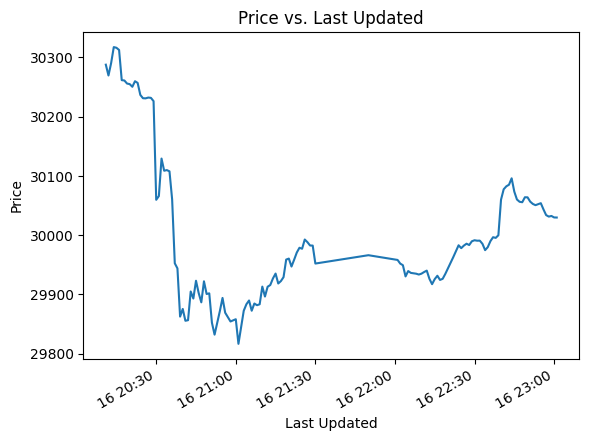

In [30]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 将 last_updated 列转换为 datetime 类型
bitcoin_data['last_updated'] = pd.to_datetime(bitcoin_data['last_updated'])

# 设置 last_updated 为索引
bitcoin_data.set_index('last_updated', inplace=True)

# 绘制 price
bitcoin_data['price'].plot()

# 设置图表标题和坐标轴标签
plt.title('Price vs. Last Updated')
plt.xlabel('Last Updated')
plt.ylabel('Price')

# 显示图表
plt.show()

In [32]:
# Some basic analysis
# Looking for anomalies in the data
# Checking that the cryptocoin prices are positive
price = (cmc_data['price']>=0).all()
# Checking that the volumes traded is positive
volume_24h = (cmc_data['volume_24h']>=0).all()
# Checking that the market caps are positive
market_cap = (cmc_data['market_cap']>=0).all()
check = [price, volume_24h, market_cap]
if False not in check:
  print("1. There were no anomalies found in the data.")
else:
  columns = ['price', 'volume_24h', 'market_cap',]
  for i in list(range(0,3)):
    if check[i] == False:
      print("1. There were anomalies found in the " + columns[i] + " column.\n")

# Check if all the IDs are the same to ensure all data in one collection are from the same cryptocurrency.

if cmc_data['id'].nunique() == 1:
    print("2. All values in column id are the same.")
else:
    print("2. Not all values in column id are the same.")


1. There were no anomalies found in the data.
2. All values in column id are the same.


In the above code, we are checking to see if all the prices, volume changes, and market caps were greater than or equal to 0 as we shouldn't see any negative values. We were also checking that if all the IDs are the same to ensure all data in one colection are from the same cryptocurrency.

In [59]:
# Checking for missing values
missing = cmc_data.isnull().sum().sum()
if missing == 0:
  print("There are no missing values in the dataset.")
else:
  print("The data contains " + str(missing) + " missing values.")

There are no missing values in the dataset.


In [81]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

KeyError: 'last_updated'